In [43]:
import os 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import lmfit

In [44]:
res = Path("Results/total_drücke.txt")
res.touch()
nf = open(res,"w")
nf.write("p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,13")

41

In [45]:
hal = [1e-5, 8.6e-6, 7.4e-6, 6.3e-6, 5.4e-6, 4.6e-6, 4.0e-6, 3.4e-6, 3e-6, 2.5e-6, 2.2e-6, 1.5e-6, 1e-6]

In [46]:
total=[]
for i in os.listdir('Data'):
    path = 'Data/'+i
    with open(path, mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T
        data = np.zeros((2,len(dataex[3])))
        data[0],data[1] = dataex[3],dataex[4]
        sum = 0
        n=0
        for f in data[1]:
            sum+=f
            n+=1
        total.append(sum/n)
        

Druckmessung 1.csv
Druckmessung 2.csv
Druckmessung 3.csv
Druckmessung 4.csv
Druckmessung 5.csv
Druckmessung 6.csv
Druckmessung 7.csv
Druckmessung 8.csv
Druckmessung 9.csv
Druckmessung _10.csv
Druckmessung _11.csv
Druckmessung _12.csv
Druckmessung _13.csv
[2.685470750469041e-07, 2.2762053547671856e-07, 1.8771477044476315e-07, 1.5491302869440473e-07, 1.3321933208255129e-07, 1.1091749530956841e-07, 8.160305099778269e-08, 6.628857723577233e-08, 5.656794878048779e-08, 4.53971219512195e-08, 3.922776422764226e-08, 3.299294634146342e-08, 1.653491056910569e-08]
[1e-05, 8.6e-06, 7.4e-06, 6.3e-06, 5.4e-06, 4.6e-06, 4e-06, 3.4e-06, 3e-06, 2.5e-06, 2.2e-06, 1.5e-06, 1e-06]


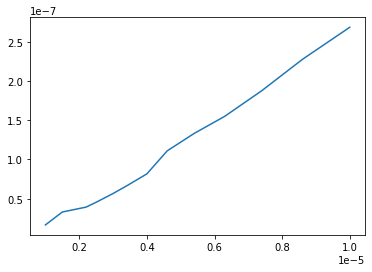

In [47]:
plt.plot(hal,total)

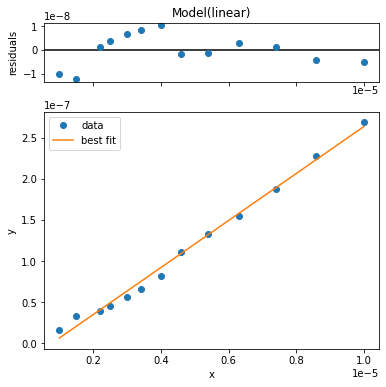

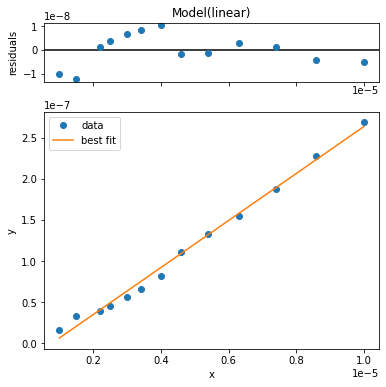

In [50]:
model_lin = lmfit.models.LinearModel()
pars_lin = model_lin.guess(data= total,x=hal)
out_lin =  model_lin.fit(total,x=hal,params=pars_lin,nan_policy='propagate')
out_lin.plot()

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 13
    # variables        = 2
    chi-square         = 5.6205e-16
    reduced chi-square = 5.1096e-17
    Akaike info crit   = -485.838510
    Bayesian info crit = -484.708611
[[Variables]]
    slope:      0.02856938 +/- 7.3873e-04 (2.59%) (init = 0.02856938)
    intercept: -2.2289e-08 +/- 3.9391e-09 (17.67%) (init = -2.228933e-08)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.864


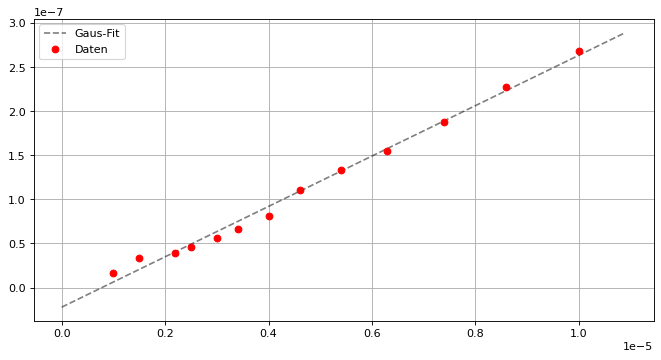

In [67]:
print(out_lin.fit_report())

fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)

plt.errorbar(hal,total,fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=15,label="Daten")
plt.plot(np.arange(0,1.1e-5,1e-7),out_lin.eval(x=np.arange(0,1.1e-5,1e-7)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")

plt.grid()
plt.legend()
plt.savefig('Results/druckvergleich.pdf')
#Müssen die daten noch reskaliert werden mit 28????????????????????